Intro

Step 1: Load the data

In [21]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/SAT_GPA.csv')

Explore the data

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAT Score  181 non-null    int64  
 1   GPA        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None


In [23]:
print(data[:5])

   SAT Score  GPA
0       1600  4.0
1       1593  4.0
2       1587  4.0
3       1580  4.0
4       1573  4.0


In [24]:
print(data.describe())

         SAT Score         GPA
count   181.000000  181.000000
mean   1000.000000    2.617901
std     349.293573    1.559243
min     400.000000    0.000000
25%     700.000000    1.390000
50%    1000.000000    3.370000
75%    1300.000000    3.970000
max    1600.000000    4.000000


Visualise the Data

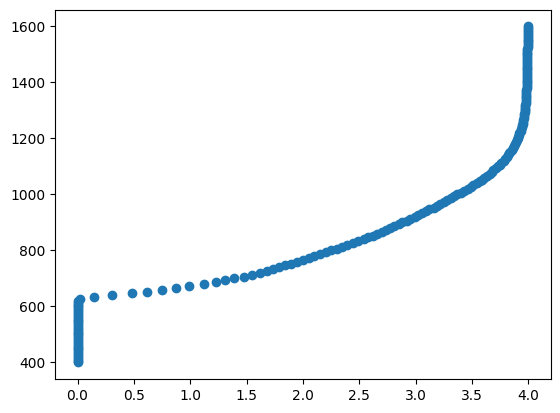

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data['GPA'], data['SAT Score'])
plt.show()

In [26]:
#Split the data
import sklearn.model_selection as ms

train_features, test_features, train_labels, test_labels = ms.train_test_split(data['GPA'], data['SAT Score'], test_size=0.2)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(144,)
(37,)
(144,)
(37,)


In [27]:
if type(train_features) != 'numpy.ndarray':
    train_features, test_features, train_labels, test_labels = train_features.to_numpy(), test_features.to_numpy(), train_labels.to_numpy(), test_labels.to_numpy()

In [28]:
train_features = np.reshape(train_features, (144, 1))
print(train_features.shape)

(144, 1)


In [29]:
test_features = np.reshape(test_features, (37, 1))
print(test_features.shape)

(37, 1)


In [30]:
#Train the model (its simpler than you think)
from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr = regr.fit(train_features, train_labels)

That's it! Model Trained!

In [31]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error as mse

train_predictions = regr.predict(train_features)

print("TRAIN Root Mean Squared Error: %.2f" % 
      (mse(train_labels, train_predictions)**0.5))

TRAIN Root Mean Squared Error: 131.78


In [32]:
test_predictions = regr.predict(test_features)

print("TEST Root Mean Squared Error: %.2f"
      % (mse(test_labels, test_predictions)**0.5))

TEST Root Mean Squared Error: 144.04


In [33]:
#This means your final result can be +- 130

#Try it yourself (replace 3.94 with your GPA):

gpa = np.reshape([3.94], (1,1))
SAT_pred = int(regr.predict(gpa))
print(SAT_pred)

1259


Model Visualisation

In [34]:
x = train_features
m = regr.coef_
c = regr.intercept_

y = m*x + c

/var/folders/hc/_rm2mjw14y9_r7933xkcw3p80000gn/T/ipykernel_91080/2686573392.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c" (-> color=(0.0, 0.75, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'c', linewidth=2, color='red')


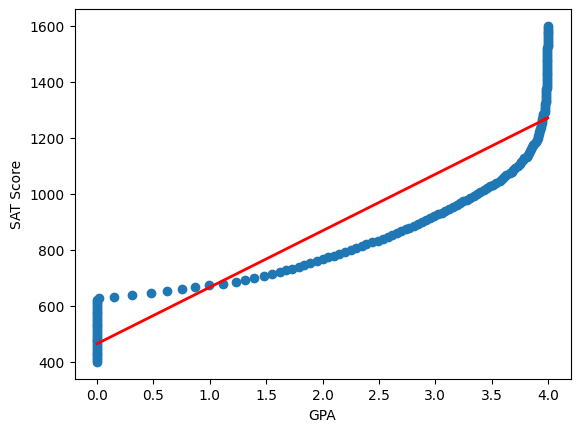

In [35]:
plt.scatter(data['GPA'], data['SAT Score'])
plt.plot(x, y, 'c', linewidth=2, color='red')
plt.xlabel('GPA')
plt.ylabel('SAT Score')

plt.show()

The performance does not seem spectacular, but this will be fixed in the next lesson